<h1><center>Prodigy InfoTech Internship</center></h1>
<h2><center>TASK 4</center></h2>
<h3><center>Submitted by: Gokul Ram K</center></h3>
Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train_df = pd.read_csv('Datasets/twitter_training.csv', header=None)
val_df = pd.read_csv('Datasets/twitter_validation.csv', header=None)

In [11]:
train_df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [12]:
val_df.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [13]:
new_df = train_df.merge(val_df)

In [14]:
new_df

,0,1,2,3
0,2419,Borderlands,Negative,@Borderlands how do I submit a complaint? Your...
1,2450,Borderlands,Positive,The next one is Borderlands: The Handsome Coll...
2,2457,Borderlands,Irrelevant,Stupid 19-year-olds who write bad poetry need ...
3,2547,Borderlands,Positive,I love u guys
4,2547,Borderlands,Positive,I love u guys
...,...,...,...,...
624,9105,Nvidia,Positive,It's Very Interesting If We Get Something For ...
625,9114,Nvidia,Neutral,@nvidia🤔 why? But why? We buy 2 cards convinc...
626,9145,Nvidia,Positive,the NVIDIA Broadcast amp came out right now an...
627,9145,Nvidia,Positive,the NVIDIA Broadcast amp came out right now an...


In [24]:
new_df = new_df.rename(columns={new_df.columns[0]:'Comments_count',new_df.columns[1]:'Company',new_df.columns[2]:'Sentiment',new_df.columns[3]:'Tweet'})

In [25]:
new_df.head()

,Comments_count,Company,Sentiment,Tweet
0,2419,Borderlands,Negative,@Borderlands how do I submit a complaint? Your...
1,2450,Borderlands,Positive,The next one is Borderlands: The Handsome Coll...
2,2457,Borderlands,Irrelevant,Stupid 19-year-olds who write bad poetry need ...
3,2547,Borderlands,Positive,I love u guys
4,2547,Borderlands,Positive,I love u guys


In [27]:
# Checking for null values
new_df.isnull().sum()

Comments_count    0
Company           0
Sentiment         0
Tweet             0
dtype: int64

In [28]:
# Drop duplicates
new_df.drop_duplicates(inplace=True)

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 0 to 628
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Comments_count  517 non-null    int64 
 1   Company         517 non-null    object
 2   Sentiment       517 non-null    object
 3   Tweet           517 non-null    object
dtypes: int64(1), object(3)
memory usage: 20.2+ KB


Sentiment
Negative      174
Positive      144
Neutral       114
Irrelevant     85
Name: count, dtype: int64



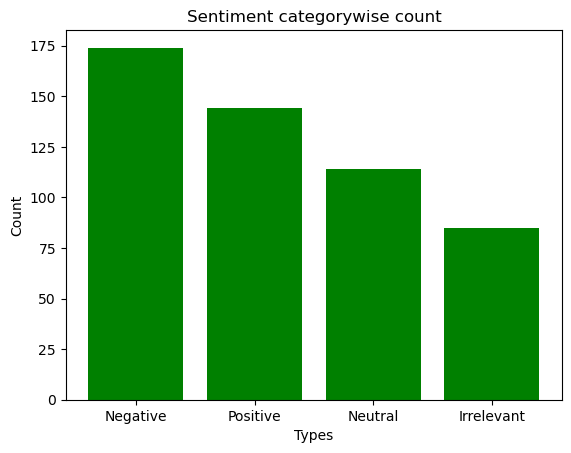

In [32]:
# Unique Sentiments present in the data

print(new_df['Sentiment'].value_counts())
print()
x = new_df['Sentiment'].value_counts().index
y = new_df['Sentiment'].value_counts().values
plt.bar(x,y,color='green')
plt.xlabel('Types')
plt.ylabel('Count')
plt.title('Sentiment categorywise count')
plt.show()

Company
GrandTheftAuto(GTA)                  25
RedDeadRedemption(RDR)               24
johnson&johnson                      22
Facebook                             22
Overwatch                            21
Verizon                              21
FIFA                                 20
Nvidia                               19
LeagueOfLegends                      19
Fortnite                             19
MaddenNFL                            18
PlayStation5(PS5)                    18
AssassinsCreed                       18
Borderlands                          17
CS-GO                                17
NBA2K                                16
Cyberpunk2077                        16
Microsoft                            15
Hearthstone                          14
TomClancysRainbowSix                 14
CallOfDutyBlackopsColdWar            13
PlayerUnknownsBattlegrounds(PUBG)    13
Google                               13
HomeDepot                            13
WorldOfCraft                    

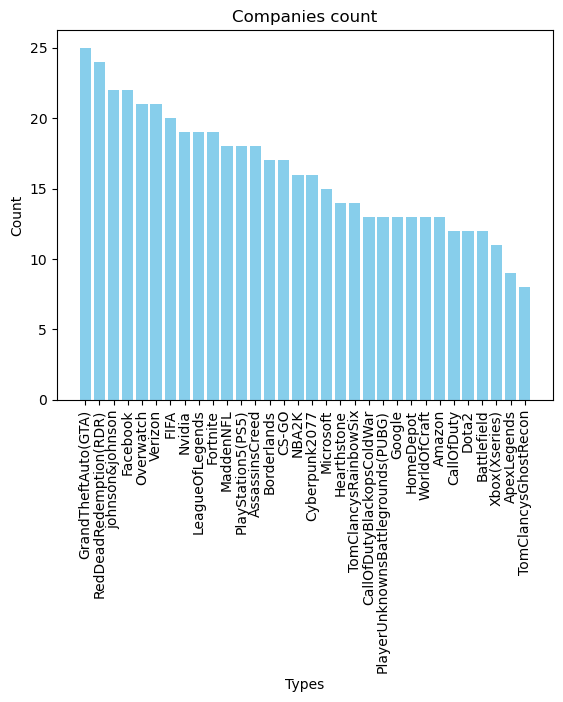

In [37]:
# Unique companies present in the data

print(new_df['Company'].value_counts())
print()
x = new_df['Company'].value_counts().index
y = new_df['Company'].value_counts().values
plt.bar(x,y,color='skyblue')
plt.xlabel('Types')
plt.ylabel('Count')
plt.title('Companies count')
plt.xticks(rotation=90)
plt.show()

In [38]:
tweet = new_df['Tweet']
tweet

0      @Borderlands how do I submit a complaint? Your...
1      The next one is Borderlands: The Handsome Coll...
2      Stupid 19-year-olds who write bad poetry need ...
3                                          I love u guys
5           Atleast I have Borderlands to cheer me up :(
                             ...                        
622                                     MOTHER. OF. GOD.
624    It's Very Interesting If We Get Something For ...
625    @nvidia🤔 why? But why?  We buy 2 cards convinc...
626    the NVIDIA Broadcast amp came out right now an...
628    The Nvidia Shield is my daily driver but I lik...
Name: Tweet, Length: 517, dtype: object

In [39]:
# Tweet cleaning

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ghaay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from tqdm import tqdm 
  
  
def preprocess_text(text_data): 
    preprocessed_text = [] 
  
    for sentence in tqdm(text_data): 
        # Removing punctuations 
        sentence = re.sub(r'[^\w\s]', '', sentence) 
  
        # Converting lowercase and removing stopwords 
        preprocessed_text.append(' '.join(token.lower() 
                                          for token in nltk.word_tokenize(sentence) 
                                          if token.lower() not in stopwords.words('english'))) 
  
    return preprocessed_text 

In [44]:
new_df['Tweet'] = new_df['Tweet'].dropna()  # Remove rows with missing values (including NaNs)

In [45]:
new_df['Tweet'] = new_df['Tweet'].astype(str)  # Convert entire column to string


In [50]:
import re
# for stopwords Removal
from nltk.corpus import stopwords

In [51]:
preprocessed_review = preprocess_text(new_df['Tweet'].values) 
new_df['Tweet'] = preprocessed_review

100%|███████████████████████████████████████████████████████████████████████████████| 517/517 [00:03<00:00, 131.23it/s]


In [52]:
# For tokenization
from nltk.tokenize import word_tokenize

In [58]:
# function for making ngrams
from nltk.util import ngrams
# load in all the modules we're going to need
import nltk
import collections
# for Wordscloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [54]:
new_df.head()

,Comments_count,Company,Sentiment,Tweet
0,2419,Borderlands,Negative,borderlands submit complaint ceo isnt paying s...
1,2450,Borderlands,Positive,next one borderlands handsome collection youre...
2,2457,Borderlands,Irrelevant,stupid 19yearolds write bad poetry need get aw...
3,2547,Borderlands,Positive,love u guys
5,2559,Borderlands,Positive,atleast borderlands cheer


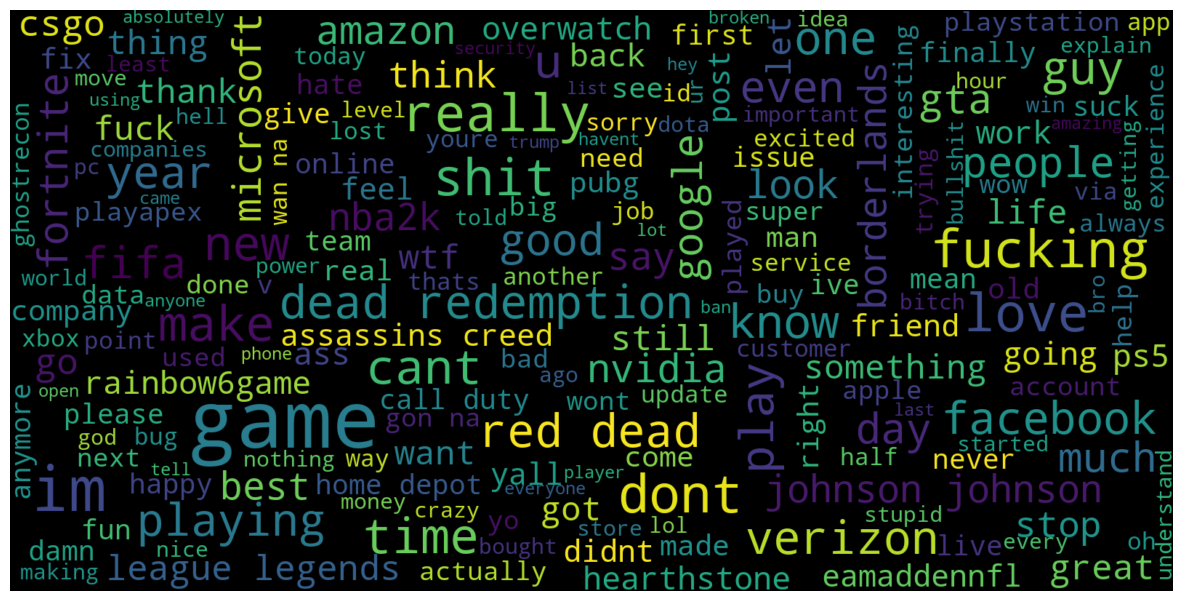

In [55]:
# Creating a word cloud

consolidated = ' '.join( 
    word for word in new_df['Tweet'].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
                      random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

In [56]:
new_df.isnull().sum()

Comments_count    0
Company           0
Sentiment         0
Tweet             0
dtype: int64

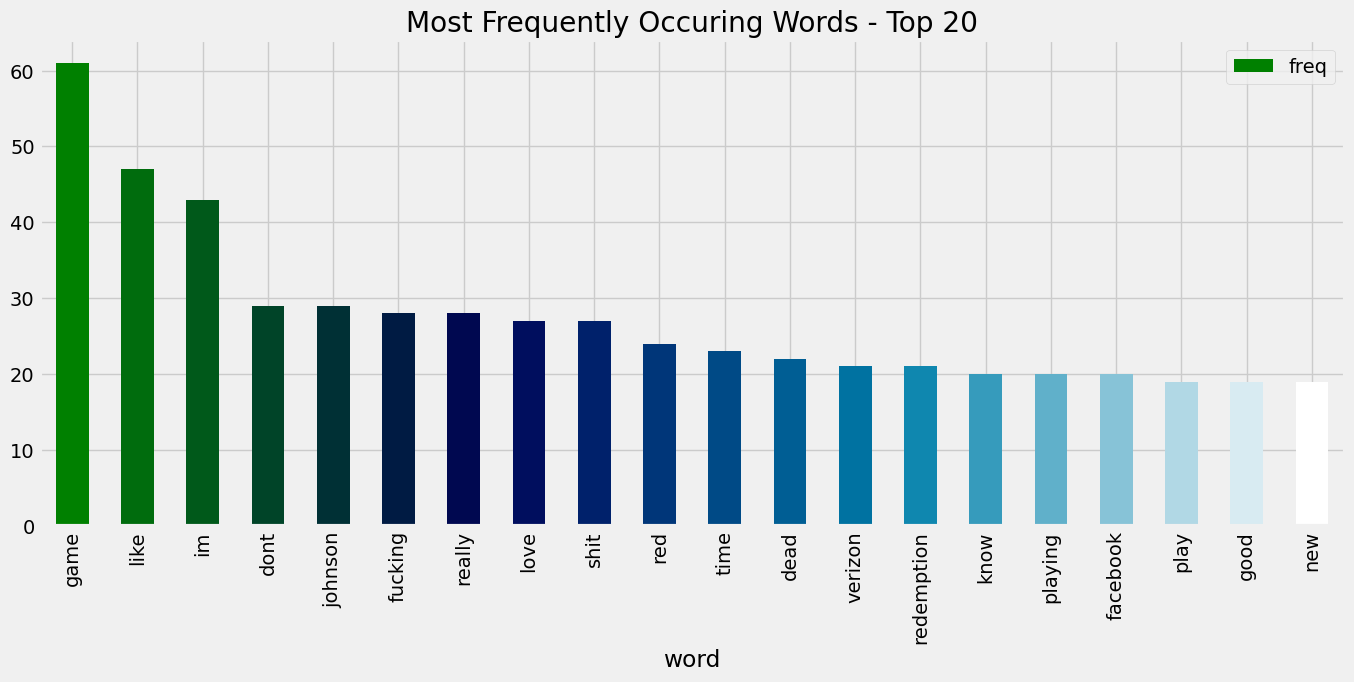

In [59]:
## Visualizing the Most Frequent Words

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(new_df.Tweet)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

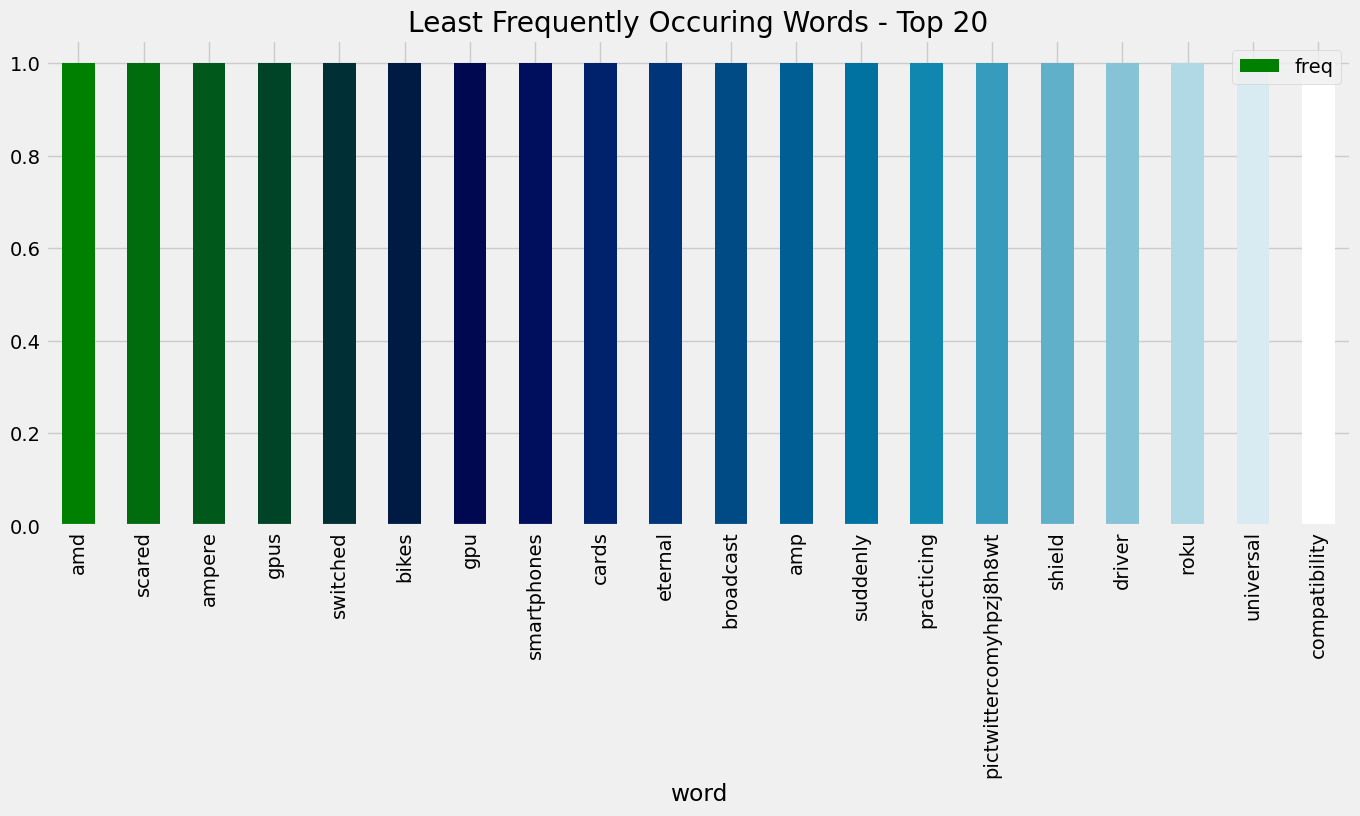

In [60]:
## Visualizing the Least Frequent Words

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(new_df.Tweet)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words - Top 20")
plt.show()

In [61]:
# Visualizing the BiGrams

text = str(new_df['Tweet'])
tokenized = text.split()

# and get a list of all the bi-grams
esBigrams = ngrams(tokenized, 2)

# get the frequency of each bigram in our corpus
esBigramFreq = collections.Counter(esBigrams)

# what are the ten most popular ngrams in this Spanish corpus?
esBigramFreq.most_common(10)

[(('0', 'borderlands'), 1),
 (('borderlands', 'submit'), 1),
 (('submit', 'complaint'), 1),
 (('complaint', 'ceo'), 1),
 (('ceo', 'isnt'), 1),
 (('isnt', 'paying'), 1),
 (('paying', 's...'), 1),
 (('s...', '1'), 1),
 (('1', 'next'), 1),
 (('next', 'one'), 1)]

In [62]:
# Visualizing the Trigrams

text = str(new_df['Tweet'])
tokenized = text.split()

# and get a list of all the bi-grams
esTrigrams = ngrams(tokenized, 3)

# get the frequency of each bigram in our corpus
esTrigramFreq = collections.Counter(esTrigrams)

# what are the ten most popular ngrams in this Spanish corpus?
esTrigramFreq.most_common(10)

[(('0', 'borderlands', 'submit'), 1),
 (('borderlands', 'submit', 'complaint'), 1),
 (('submit', 'complaint', 'ceo'), 1),
 (('complaint', 'ceo', 'isnt'), 1),
 (('ceo', 'isnt', 'paying'), 1),
 (('isnt', 'paying', 's...'), 1),
 (('paying', 's...', '1'), 1),
 (('s...', '1', 'next'), 1),
 (('1', 'next', 'one'), 1),
 (('next', 'one', 'borderlands'), 1)]

In [63]:
# Defining a function to visualise n-grams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

C:\Users\Ghaay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

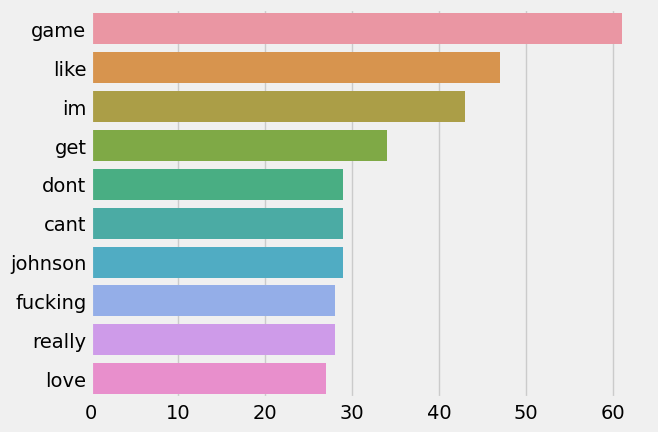

In [64]:
# Visualising the most frequent unigrams in the tweets
top_unigrams = get_top_ngram(new_df['Tweet'],1)[:10]
x,y = map(list,zip(*top_unigrams))
sns.barplot(x = y,y = x)

C:\Users\Ghaay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

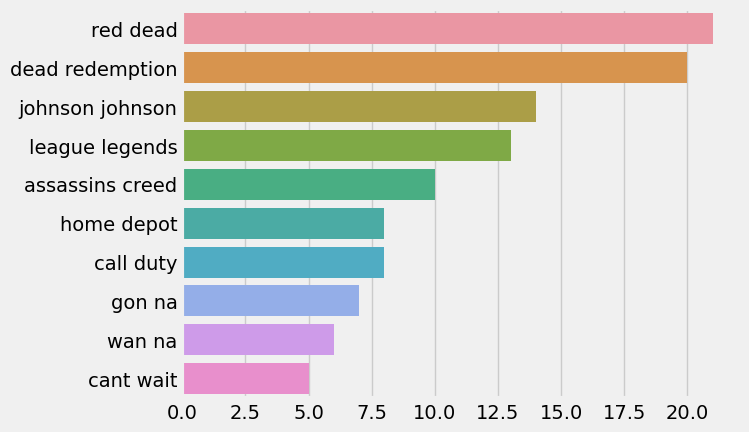

In [65]:
# Visualising the most frequent bigrams in the tweets
top_bigrams = get_top_ngram(new_df['Tweet'],2)[:10]
x,y = map(list,zip(*top_bigrams))
sns.barplot(x = y,y = x)

In [68]:
# Lets calculate the length of the Reviews
new_df['length'] = new_df['Tweet'].apply(len)

In [69]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [70]:
nltk.download('vader_lexicon')  # Download VADER sentiment lexicon
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ghaay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [71]:
def get_polarity(text):
    scores = sia.polarity_scores(text)
    return scores['compound']  # Get overall sentiment score

In [73]:
# Apply the function
new_df['polarity'] = new_df['Tweet'].apply(get_polarity)

In [74]:
def get_subjectivity(text):
    compound_score = get_polarity(text)
    # Heuristic: More extreme sentiment scores indicate stronger opinions (more subjective)
    abs_score = abs(compound_score)
    if abs_score <= 0.2:  # Neutral sentiment (likely objective)
        return 0.2
    elif abs_score <= 0.5:  # Weak sentiment (somewhat subjective)
        return 0.5
    else:  # Strong sentiment (likely subjective)
        return 0.8


In [75]:
# Apply the functions
new_df['subjectivity'] = new_df['Tweet'].apply(get_subjectivity)

In [77]:
new_df[['length','polarity','subjectivity']].describe()

,length,polarity,subjectivity
count,517.000000,517.000000,517.000000
mean,76.295938,0.006069,0.597485
std,49.494415,0.550272,0.236031
min,0.000000,-0.970900,0.200000
25%,38.000000,-0.493900,0.500000
50%,69.000000,0.000000,0.800000
75%,104.000000,0.557400,0.800000
max,220.000000,0.972600,0.800000


In [78]:
# calculating the Character Count in the Reviews
new_df['char_count'] = new_df['Tweet'].apply(len)

In [79]:
# calculating the Word Count
new_df['word_count'] = new_df['Tweet'].apply(lambda x: len(x.split()))

In [80]:
# Calculating the Word Density
new_df['word_density'] = new_df['char_count'] / (new_df['word_count']+1)

In [81]:
# importing the List of Punctuations
import string
punctuation = string.punctuation

# Calculating the Punctuation Count
new_df['punctuation_count'] = new_df['Tweet'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 

In [82]:
## lets summarize the Newly Created Features
new_df[['char_count','word_count','word_density','punctuation_count']].describe()

,char_count,word_count,word_density,punctuation_count
count,517.000000,517.000000,517.000000,517.000000
mean,76.295938,11.069632,6.026121,0.030948
std,49.494415,7.184648,1.637822,0.184185
min,0.000000,0.000000,0.000000,0.000000
25%,38.000000,6.000000,5.142857,0.000000
50%,69.000000,10.000000,6.000000,0.000000
75%,104.000000,15.000000,7.000000,0.000000
max,220.000000,37.000000,18.250000,2.000000


C:\Users\Ghaay\AppData\Local\Temp\ipykernel_14668\4202745970.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['polarity'])
C:\Users\Ghaay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ghaay\AppData\Local\Temp\ipykernel_14668\4202745970.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexi

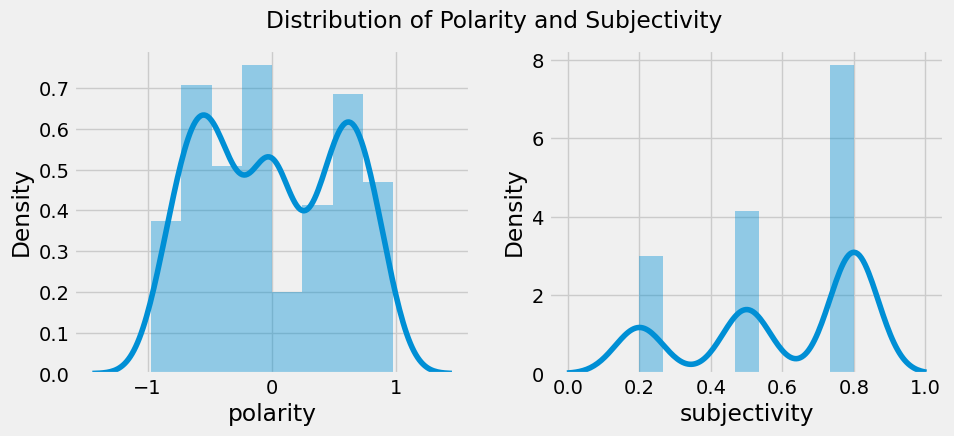

In [83]:
## Visualizing Polarity and Subjectivity

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(new_df['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(new_df['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

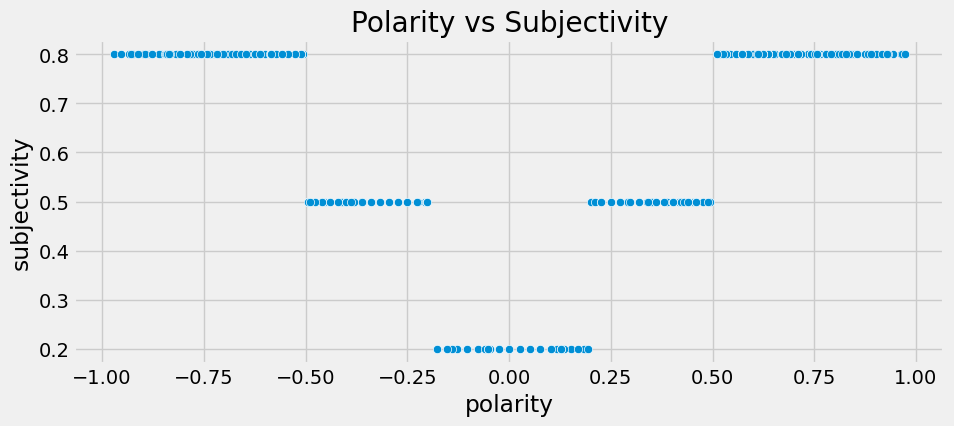

In [84]:
sns.scatterplot(x=new_df['polarity'], y=new_df['subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()

In [91]:
scores

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [90]:
scores['compound']

0.6369

In [85]:
def get_polarity(text):
    scores = sia.polarity_scores(text)
    compound_score = scores['compound']

    # Categorize polarity based on VADER's compound score
    if compound_score == 0:
        return "Neutral"
    elif compound_score > 0:
        if compound_score <= 0.3:
            return "Weakly Positive"
        elif compound_score <= 0.6:
            return "Positive"
        else:
            return "Strongly Positive"
    else:  # compound_score < 0
        if compound_score >= -0.3:
            return "Weakly Negative"
        elif compound_score >= -0.6:
            return "Negative"
        else:
            return "Strongly Negative"

# Apply the functions 
new_df['polarity'] = new_df['Tweet'].apply(get_polarity)


In [87]:
new_df['polarity'].value_counts()

polarity
Negative             108
Strongly Positive    105
Strongly Negative     86
Positive              83
Neutral               58
Weakly Negative       43
Weakly Positive       34
Name: count, dtype: int64

In [96]:
# # Calculate overall polarity (average compound score)
overall_polarity = sum(scores['compound'] for _, scores in new_df['Tweet'].apply(sia.polarity_scores).items()) / len(new_df)
polarity = overall_polarity
polarity


0.0060692456479690534

In [104]:
# input for term to be searched and how many Review to search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))


Enter Keyword/Tag to search about:  like
Enter how many tweets to search:  50


In [105]:
# finding average reaction
polarity = polarity / NoOfTerms
polarity

1.2138491295938107e-06

In [106]:
# To calculate the Prsentage
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [107]:
# finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)

In [108]:
# printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " Review.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on like by analyzing 50 Review.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Positive

------------------------------------------------------------------------------------------

Detailed Report: 
0.00% people thought it was positive
0.00% people thought it was weakly positive
4.00% people thought it was strongly positive
0.00% people thought it was negative
0.00% people thought it was weakly negative
4.00% people thought it was strongly negative
0.00% people thought it was neutral


In [109]:
# Define the sentance to Plot the Pieplot 
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

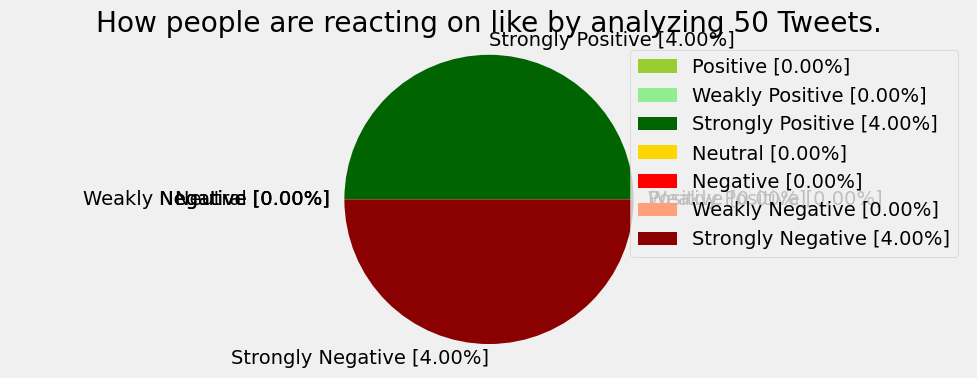

In [110]:
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()